**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Loading the datasets](#toc1_2_)    
- [Performing **t-tests** for comparing the means across *two groups* of a variable](#toc2_)    
  - [Independent t-test](#toc2_1_)    
  - [Paired t-test](#toc2_2_)    
- [ANOVA: Comparing means across multiple groups of a variable](#toc3_)    
    - [-> Post-hoc pairwise t-tests](#toc3_1_1_)    
      - [*Adjusting the significance level*](#toc3_1_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import norm

In [4]:
from numpy.random import default_rng

rng = default_rng(seed=328)

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- The *"late_shipments"* dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The "late" column denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

In [5]:
late_shipments = pd.read_feather("./datasets/late_shipments.feather")

In [6]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [7]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

- The *"dem_votes_potus_12_16"* dataset contains the percentage of votes for the Democratic candidate in the 2012 and 2016 presidential elections for each county in the United States. The "dem_percent_2012" column contains the percentage of votes for the Democratic candidate in the 2012 election, and the "dem_percent_2016" column contains the percentage of votes for the Democratic candidate in the 2016 election.

In [8]:
sample_dem_data = pd.read_feather("./datasets/dem_votes_potus_12_16.feather")

In [9]:
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [10]:
sample_dem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           500 non-null    object 
 1   county          500 non-null    object 
 2   dem_percent_12  500 non-null    float64
 3   dem_percent_16  500 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


## <a id='toc2_'></a>[Performing **t-tests** for comparing the means across *two groups* of a variable](#toc0_)

To compare the means of two groups **z-test** can be used if the population standard deviation is known. Otherwise, the **t-test** is used.

**`Note:`** t-tests can only be used to compare the means of two groups of a variable and no other sample statistics.

### <a id='toc2_1_'></a>[Independent t-test](#toc0_)
In an independent t-test, we are comparing the means of two independent groups of a variable. Here the term independent means that the two groups are not directly related to each other i.e, there are no inherent relationships between the two groups.

For comparing the mean across two independent groups of a variable, we use the **two-sample t-test**. 

The Null Hypothesis $H_0$ is that the means of the two populations are equal i.e, $H_0: \mu_1 = \mu_2$.

The Alternative Hypothesis $H_A$ is that the means of the two populations are not equal i.e, $H_A: \mu_1 \neq \mu_2$.

For comparing two different populations i.e, across two groups of a variable, we use the difference of the estimators to test the Null Hypothesis. 

The t-score is given as,

$$ t = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$


Assuming the Null Hypothesis is true i.e, $H_0: \mu_1 - \mu_2 = 0$, we can reduce the above equation to,

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$


Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

The t-distribution is fairly similar to the z-distribution, but has heavier tails. The t-distribution is parameterized by the degrees of freedom, which is the number of observations in the sample minus one. As the degrees of freedom increases, the t-distribution approaches the z-distribution.

The degrees of freedom for comparing two groups of a variable is given as, $df = min(n_1 - 1, n_2 - 1)$. 

Using the calculated degrees of freedom, the corresponding significance level for a t-score can be found from the t-table. The t-table gives the area under the t-distribution curve to the left of a given t-score.

> Let's see how to calculate the t-score using the "late shipments" dataset and then we will see how to find the corresponding p-value for a t-distribution.

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. To answer this question statistically, we can perform a t-test for the difference in means between the weights of the two groups in the "late" column i.e, the "Yes" group and the "No" group.

$$H_0: \mu_{weight, on-time} - \mu_{weight, late} = 0$$
$$H_A: \mu_{weight, on-time} - \mu_{weight, late} < 0$$

In [11]:
# First let's split the dataset into two groups
late_yes = late_shipments[late_shipments.late == "Yes"]
late_no = late_shipments[late_shipments.late == "No"]

In [12]:
# Calculate sample statistics
xbar_yes = np.mean(late_yes.weight_kilograms)
xbar_no = np.mean(late_no.weight_kilograms)

s_yes = np.std(late_yes.weight_kilograms, ddof=1)
s_no = np.std(late_no.weight_kilograms, ddof=1)

n_yes = len(late_yes)
n_no = len(late_no)

In [13]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_yes**2 / n_yes) + (s_no**2 / n_no))

# Calculate the test statistic
t_stat = numerator / denominator

In [14]:
# Print the test statistic
print(t_stat)

-2.3936661778766433


In [15]:
# Choose a significance level
alpha = 0.05

We can use the `t.cdf()` function from the `scipy.stats` module to find the p-value for a given t-score. The `t.cdf()` function takes in a t-score and the degrees of freedom and returns the area under the t-distribution curve to the left of that t-score.

In [16]:
from scipy.stats import t

In [17]:
# Find the degrees of freedom
dof = min(n_yes - 1, n_no - 1)

In [18]:
# Find out the p-value from the t distribution
# This is a left tailed test
p_value = t.cdf(t_stat, dof)

In [19]:
# Print the result
print(p_value)

0.009912394311103325


In [20]:
p_value < alpha

True

Since the calculated p-value (0.009) is less than the significance level (0.05), we reject the null hypothesis. This means that we have enough evidence to say that the weight of the shipments that were on time is less than the weight of the shipments that were late.

### <a id='toc2_2_'></a>[Paired t-test](#toc0_)

A paired t-test is a statistical test used to compare the means of **two related groups**. 

It is a type of paired-samples t-test, which means that each subject or entity is measured twice, resulting in pairs of observations. 

Paired t-tests are often used in before-and-after studies or in studies where two different treatments are applied to the same group of subjects.

The Null Hypothesis $H_0$ is that the means of the two related groups are equal i.e, $H_0: \mu_1 = \mu_2$.

The Alternative Hypothesis $H_A$ is that the means of the two related groups are not equal i.e, $H_A: \mu_1 \neq \mu_2$.

For comparing two related groups, we use the difference of the variable across the two groups to test the Null Hypothesis.

The t-score is given as (assuming the Null Hypothesis is true),

$$ t = \frac{\bar{x}_d}{\frac{s_d}{\sqrt{n}}} $$

Where:
- $\bar{x}_d = \overline{(x_1 - x_2)}$
- $s_d$ is the sample standard deviation of the difference between the two related groups and $n$ is the sample size of the two related groups.

> We'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016 from the  "sample_dem_data" dataset. Since the counties are the same in both years, these samples are paired.

Our Null Hypothesis is that the proportion of democratic votes in 2012 and 2016 were the same i.e, 

$$H_0: \mu_{dem\_percent\_12} = \mu_{dem\_percent\_16}$$

And the Alternate Hypothesis is that the proportion of democratic votes in 2012 and 2016 were different i.e, 

$$H_A: \mu_{dem\_percent\_12} \neq \mu_{dem\_percent\_16}$$

In [21]:
# Calculate the differences from 2012 to 2016
sample_dem_data["diff"] = (
    sample_dem_data["dem_percent_12"] - sample_dem_data["dem_percent_16"]
)

In [22]:
# Find the mean of the diff column
xbar_diff = sample_dem_data["diff"].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data["diff"].std()

In [23]:
print(xbar_diff)
print(s_diff)

6.829312660106834
5.040139140132317


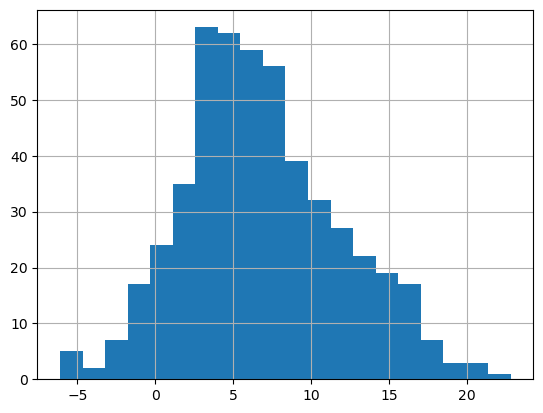

In [24]:
# It's a good idea to see the distribution of the data before calculating the t-score
# Plot a histogram of diff with 20 bins
sample_dem_data["diff"].hist(bins=20)
plt.show()

We can use the `pingouin.ttest()` from the `pingouin` module to perform a paired t-test. The `pingouin.ttest()` function takes in two arrays of values and returns the t-score and the p-value for the paired t-test. The result is also more interpretable.

In [25]:
import pingouin

In [26]:
# Choose a significance level
alpha = 0.01

In [27]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(
    x=sample_dem_data["dem_percent_12"],
    y=sample_dem_data["dem_percent_16"],
    paired=True,
    alternative="two-sided",
    confidence=(1 - alpha),
)


# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.2464870469716605, 7.412138273242007]",0.454202,2.246e+111,1.0


**Note:** When the data is paired but we use a normal independent t-test, the probability of making a Type I error (failure to reject the null hypothesis when it is false) increases significantly. This is because the paired data is not independent i.e, there's some underlying relationship. The paired t-test corrects for this by using the difference between the paired observations.

In [28]:
pingouin.ttest(
    x=sample_dem_data["dem_percent_12"],
    y=sample_dem_data["dem_percent_16"],
    paired=False,
    alternative="two-sided",
    confidence=(1 - alpha),
)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.375133508237438, 9.283491811976223]",0.454202,4.308e+09,1.0


In [29]:
paired_test_results["p-val"] < alpha

T-test    True
Name: p-val, dtype: bool

Since the p-value is far less than the significance level (0.01) we reject the null hypothesis. This means that we have enough evidence to say that the proportion of democratic votes in 2012 and 2016 were different.

## <a id='toc3_'></a>[ANOVA: Comparing means across multiple groups of a variable](#toc0_)

ANOVA stands for Analysis of Variance. It is a statistical test used to compare the means of three or more groups. ANOVA is used to determine if there is a significant difference between the groups, and if so, to identify which groups are different.

ANOVA works by partitioning the total variance in the data into two parts: the variance between the groups and the variance within the groups. The variance between the groups is a measure of how much the group means differ from each other. The variance within the groups is a measure of how much the individual observations within each group differ from their group mean.

ANOVA then calculates a test statistic, called the F-statistic, which is a ratio of the variance between the groups to the variance within the groups. The F-statistic is used to test the null hypothesis that there is no difference between the group means.

If the F-statistic is statistically significant, then the null hypothesis is rejected and we conclude that there is a significant difference between the group means. However, ANOVA cannot tell us which groups are different. To determine which groups are different, we need to perform post-hoc pairwise t-tests.

In ANOVA, the categorical variable is the *explanatory variable* and the numerical variable is the *response variable*. The groups are the different levels of the categorical variable.

> Here, we'll return to the late shipments data, and perform an ANOVA test to see if the variation in the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean" is statistically significant.

Null Hypothesis, $$ H_0: \mu_{\text{pack price, Air}} = \mu_{\text{pack price, AirCharter}} = \mu_{\text{pack price, Ocean}} $$
Alternate Hypothesis, $$ H_A: \text{There are at least two groups with different means} $$

In [30]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].std()

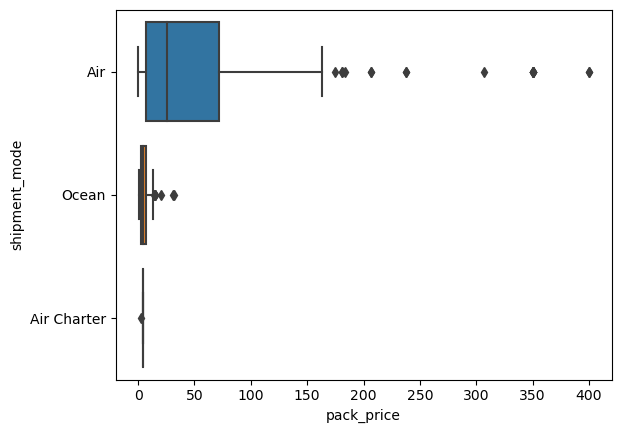

In [31]:
# Before performing any test it is a good practice to explore the distribution of the variables at first
# Here we will be looking at the distribution of the different groups in the explanatory variable using a Box plot

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x="pack_price", y="shipment_mode")
plt.show()

There certainly looks to be a difference in the pack price between each of the three shipment modes. The only question is are the differences statistically significant?

In [32]:
# Choose a significance level
alpha = 0.1

**Note:** This value is larger than in many situations but will help us understand the implications on comparing different numbers of groups later on. 

The `pingouin.anova()` function from the `pingouin` module can be used to perform ANOVA. The `pingouin.anova()` function takes in a dataframe, the name of the response variable and the name of the categorical variable and returns the F-statistic and the p-value for the ANOVA test.

In [33]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(
    data=late_shipments, dv="pack_price", between="shipment_mode"
)

# Print anova_results
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


The calculated p-value is much much less than the significance level (0.2). This means that we reject the null hypothesis and there is a significant difference in pack prices between the shipment modes (or at least two shipment modes). However, we don't know which shipment modes this applies to.

#### <a id='toc3_1_1_'></a>[-> Post-hoc pairwise t-tests](#toc0_)

To find out which groups have statistically significant different means, we pair each group with every other group and perform a separate t-test for each pair. If there are $k$ groups, then there are $\frac{k(k-1)}{2}$ pairs.

To run all these pairwise t-tests we can use the `pingouin.pairwise_tests()` function from the `pingouin` module. The `pingouin.pairwise_tests()` function takes in a dataframe, the name of the response variable and the name of the categorical variable (similar to the `.anova()` function) and returns the p-value for each pair.

In [34]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(
    data=late_shipments, dv="pack_price", between="shipment_mode", padjust=None
)

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


##### <a id='toc3_1_1_1_'></a>[*Adjusting the significance level*](#toc0_)

As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least one of them will give a false positive significant result. With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. With five groups and ten tests, the probability of at least one false positive is around point-seven. With twenty groups, it's almost guaranteed that we'll get at least one false positive. The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the Bonferroni correction. In the Bonferroni correction, the adjusted significance level is given as, $\alpha^* = \frac{\alpha}{k(k-1)/2}$ where $k$ is the number of groups.

To adjust the significance level in our pairwise t-tests, we can use the `padjust` parameter in the `pingouin.pairwise_tests()` function. The `padjust` parameter takes in a string specifying the type of adjustment to use. The default is "bonferroni". There are several other types of adjustments available.

In [35]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(
    data=late_shipments, dv="pack_price", between="shipment_mode", padjust="bonf"
)

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1. So we can conclude that there is a statistically significant difference in the pack price between each of the three shipment modes.

**`Caution:`** In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

In [36]:
# Count the shipment_mode values
counts = late_shipments["shipment_mode"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


Based on the result, we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.